<h2 align="center">Census-based Income Predictive Modeling :  An Analysis of the `Census Income`</h2>

### Abstract:

- The dataset used in this project is the `Adult dataset` from the UCI Machine Learning Repository, available at https://archive.ics.uci.edu/ml/datasets/Adult.

- Using this dataset, we will predict whether income exceeds $\$ 50 K/yr$ based on census data. Also known as `Census Income` dataset.
	

### Learning Agenda of this Notebook
- Basic Understanding the dataset
- Exploratory Data Analysis
- Data Preprocessing 
    - Handling Missing Values
    - Handling Outliers
    - Handling Numerical/Categorical Columns
- Model Building
    - Train/Test Split
    - Model Training
    - Model Building and Feature Selection
    - Predict the Results
- Model Evaluation Technqiues
    - Accuracy
    - Confusion Matrix
    - Classification Metrics
    - ROC VS AUC
- K-Fold Cross Validation
- HyperParameter Tuning
- Prediction on New Data 
- Save /Load Model
- Web Application of the Model

In [242]:
# Import all the required libraries 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, roc_curve
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

#### Data-Set Description:

- **age:** continuous.
- **workclass:** Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov, Without-pay, Never-worked.
- **final-weight:** continuous.
- **education:** Bachelors, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm, Assoc-voc, 9th, 7th-8th, 12th, Masters, 1st-4th, 10th, Doctorate, 5th-6th, Preschool.
- **education-num:** continuous.
- **marital-status:** Married-civ-spouse, Divorced, Never-married, Separated, Widowed, Married-spouse-absent, Married-AF-spouse.
- **occupation:** Tech-support, Craft-repair, Other-service, Sales, Exec-managerial, Prof-specialty, Handlers-cleaners, Machine-op-inspct, Adm-clerical, Farming-fishing, Transport-moving, Priv-house-serv, Protective-serv, Armed-Forces.
- **relationship:** Wife, Own-child, Husband, Not-in-family, Other-relative, Unmarried.
- **race:** White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other, Black.
- **sex:** Female, Male.
- **capital-gain:** continuous.
- **capital-loss:** continuous.
- **hours-per-week:** continuous.
- **native-country:** United-States, Cambodia, England, Puerto-Rico, Canada, Germany, Outlying-US(Guam-USVI-etc), India, Japan, Greece, South, China, Cuba, Iran, Honduras, Philippines, Italy, Poland, Jamaica, Vietnam, Mexico, Portugal, Ireland, France, Dominican-Republic, Laos, Ecuador, Taiwan, Haiti, Columbia, Hungary, Guatemala, Nicaragua, Scotland, Thailand, Yugoslavia, El-Salvador, Trinadad&Tobago, Peru, Hong, Holand-Netherlands.
- **target**: Predicted Value

In [184]:
columns = ['age', 'workclass', 'final-weight', 'education', 'education-num', 
'marital-status', 'occupation', 'relationship', 
'race', 'sex', 'capital-gain', 'capital-loss',
'hours-per-week',  'native-country', 'target']

In [185]:
# load dataset
df = pd.read_csv('data/adult.csv', names=columns, na_values=['N/A', 'NA', '?'], na_filter=True)

In [186]:
df.head(2)

,age,workclass,final-weight,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,target
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K


### Basic Understanding the dataset

In [187]:
# view dimensions of dataset
df.shape

(32561, 15)

In [188]:
# view summary of dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   final-weight    32561 non-null  int64 
 3   education       32561 non-null  object
 4   education-num   32561 non-null  int64 
 5   marital-status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital-gain    32561 non-null  int64 
 11  capital-loss    32561 non-null  int64 
 12  hours-per-week  32561 non-null  int64 
 13  native-country  32561 non-null  object
 14  target          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [189]:
# view descriptive view of dataset
df.describe()

,age,final-weight,education-num,capital-gain,capital-loss,hours-per-week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


**replace `-` in all the columns name with `_`**

In [190]:
df.columns = df.columns.str.replace('-','_')

**Types of variables/columns**

Here, we segregate the dataset into categorical and numerical variables. There are a mixture of categorical and numerical variables in the dataset. Categorical variables have data type object. Numerical variables have data type int64.

In [191]:
# the categorical columns
cat_columns = [var for var in df.columns if df[var].dtype =='O']
print('There are {} categorical variables\n'.format(len(cat_columns)))
print('The categorical variables are :\n\n', cat_columns)

There are 9 categorical variables

The categorical variables are :

 ['workclass', 'education', 'marital_status', 'occupation', 'relationship', 'race', 'sex', 'native_country', 'target']


In [192]:
# view the categorical columns
df[cat_columns].head(3)

,workclass,education,marital_status,occupation,relationship,race,sex,native_country,target
0,State-gov,Bachelors,Never-married,Adm-clerical,Not-in-family,White,Male,United-States,<=50K
1,Self-emp-not-inc,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male,United-States,<=50K
2,Private,HS-grad,Divorced,Handlers-cleaners,Not-in-family,White,Male,United-States,<=50K


In [193]:
df.isna().sum()

age               0
workclass         0
final_weight      0
education         0
education_num     0
marital_status    0
occupation        0
relationship      0
race              0
sex               0
capital_gain      0
capital_loss      0
hours_per_week    0
native_country    0
target            0
dtype: int64

In [194]:
# missing values in categorical columns
df[cat_columns].isna().sum()

workclass         0
education         0
marital_status    0
occupation        0
relationship      0
race              0
sex               0
native_country    0
target            0
dtype: int64

In [195]:
# view frequency counts of values in categorical columns
for col in cat_columns:
    print(df[col].value_counts())

 Private             22696
 Self-emp-not-inc     2541
 Local-gov            2093
 ?                    1836
 State-gov            1298
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
Name: workclass, dtype: int64
 HS-grad         10501
 Some-college     7291
 Bachelors        5355
 Masters          1723
 Assoc-voc        1382
 11th             1175
 Assoc-acdm       1067
 10th              933
 7th-8th           646
 Prof-school       576
 9th               514
 12th              433
 Doctorate         413
 5th-6th           333
 1st-4th           168
 Preschool          51
Name: education, dtype: int64
 Married-civ-spouse       14976
 Never-married            10683
 Divorced                  4443
 Separated                 1025
 Widowed                    993
 Married-spouse-absent      418
 Married-AF-spouse           23
Name: marital_status, dtype: int64
 Prof-specialty       4140
 Craft-repair         4099
 Exec-managerial

#### Interpretation:
- Now, we can see that there are several variables like `workclass`, `occupation` and `native_country` which contain missing values, in this case the missing values are coded as `?`. We have to replace `?` with `NaN`

In [196]:
# replace '?' values with `NaN`
df.workclass.replace("?", np.NaN)
df.occupation.replace('?', np.NaN, inplace=True)
df.native_country.replace('?', np.NaN, inplace=True)

In [197]:
# missing values in categorical variables again
df.isna().sum()

age               0
workclass         0
final_weight      0
education         0
education_num     0
marital_status    0
occupation        0
relationship      0
race              0
sex               0
capital_gain      0
capital_loss      0
hours_per_week    0
native_country    0
target            0
dtype: int64

In [198]:
# check for cardinality in categorical columns

for col in cat_columns:
    print(col, 'contains : ', df[col].nunique(), 'labels')

workclass contains :  9 labels
education contains :  16 labels
marital_status contains :  7 labels
occupation contains :  15 labels
relationship contains :  6 labels
race contains :  5 labels
sex contains :  2 labels
native_country contains :  42 labels
target contains :  2 labels


In [199]:
# show numerical variables
num_cols = [col for col in df.columns if df[col].dtype != 'O']
print('There are {} numerical variables\n'.format(len(num_cols)))
print('The numerical variables are :', num_cols)


There are 6 numerical variables

The numerical variables are : ['age', 'final_weight', 'education_num', 'capital_gain', 'capital_loss', 'hours_per_week']


In [200]:
#  missing values in numerical variables
df[num_cols].isna().sum()

age               0
final_weight      0
education_num     0
capital_gain      0
capital_loss      0
hours_per_week    0
dtype: int64

### Exploratory Data Analysis
#### Uni-variate Analysis
Plot `count-plot` for all the categorical columns


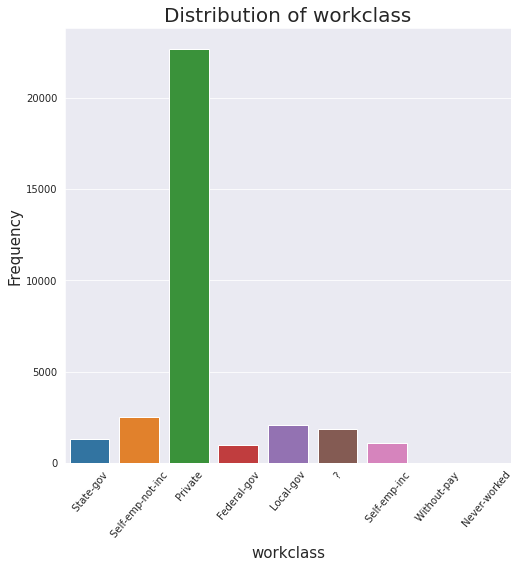

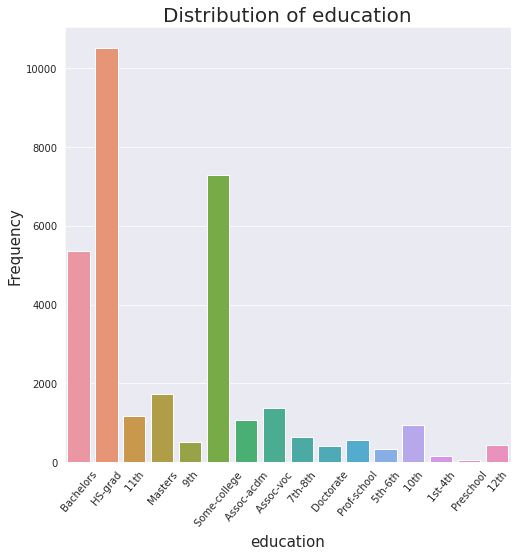

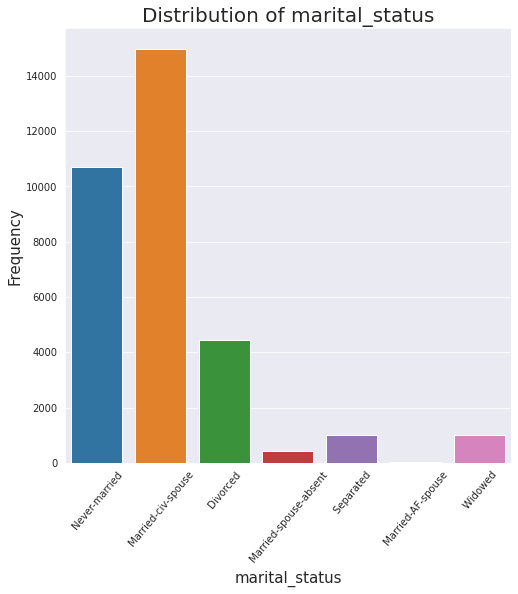

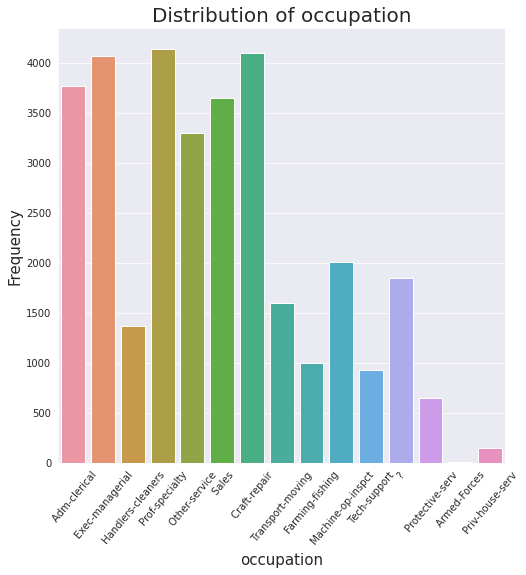

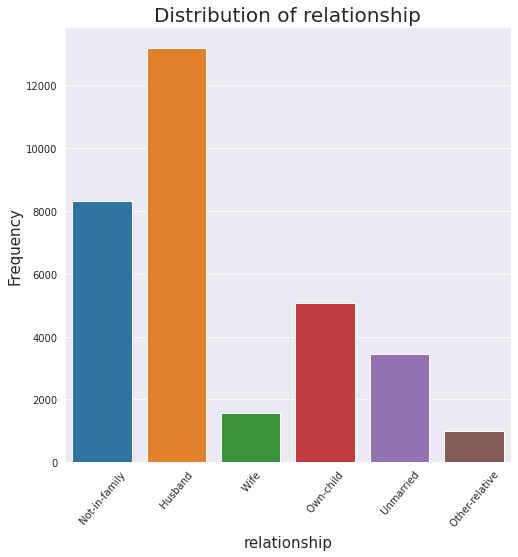

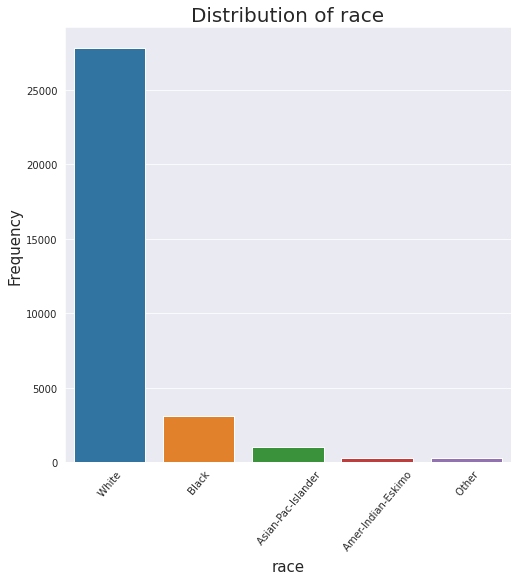

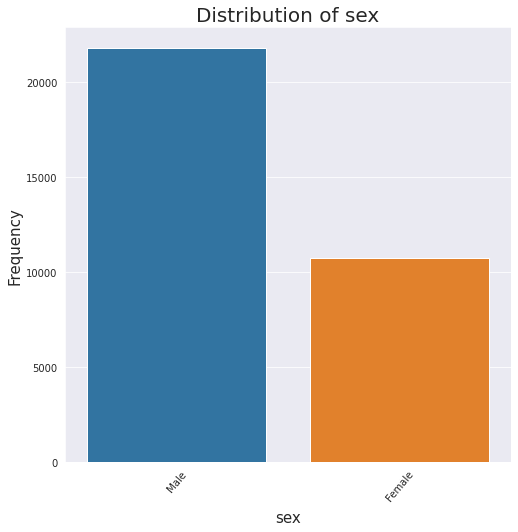

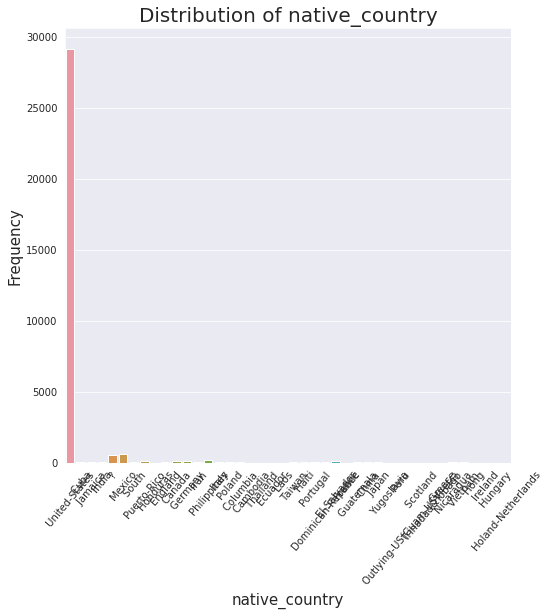

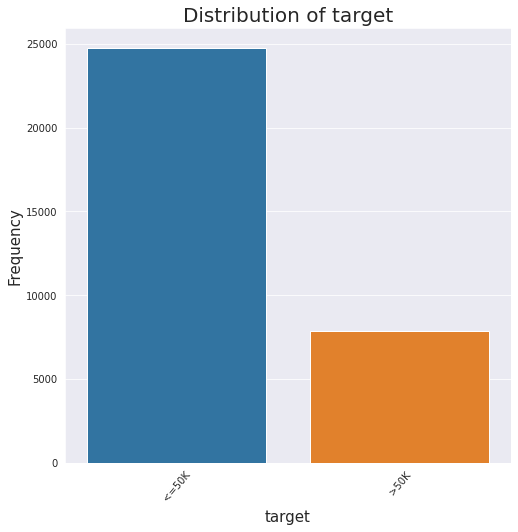

In [108]:
sns.set_style('darkgrid')
for col in cat_columns:
#     print(col)
    plt.figure(figsize=(8,8))
    sns.countplot(x=col, data=df)
    plt.title(f"Distribution of {col}", fontsize=20)
    plt.xlabel(f"{col}", fontsize=15)
    plt.ylabel("Frequency", fontsize=15)
    plt.xticks(rotation=50)
    plt.show()

Plot `Histogram` for all the Numerical Columns

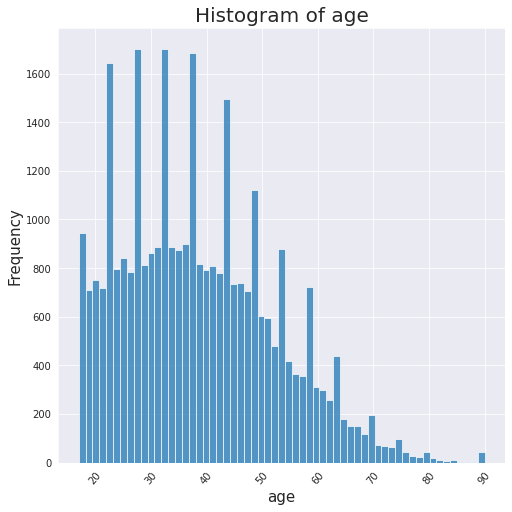

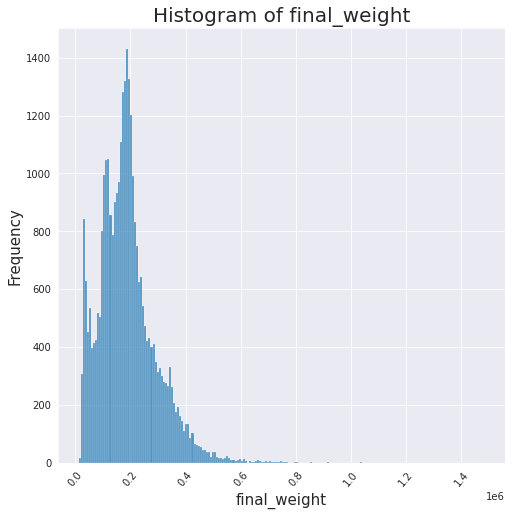

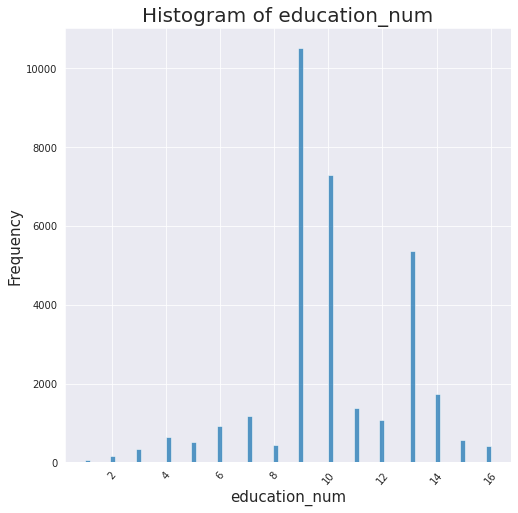

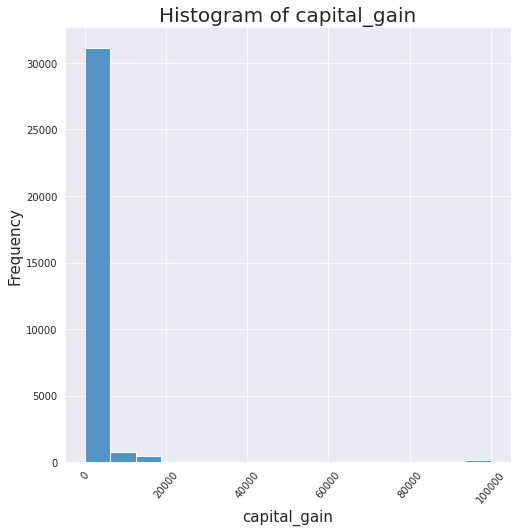

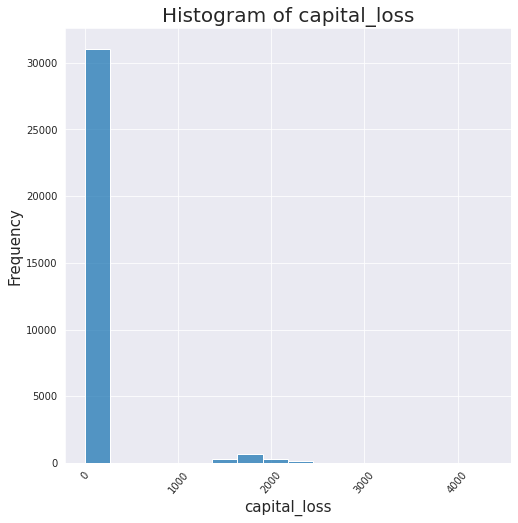

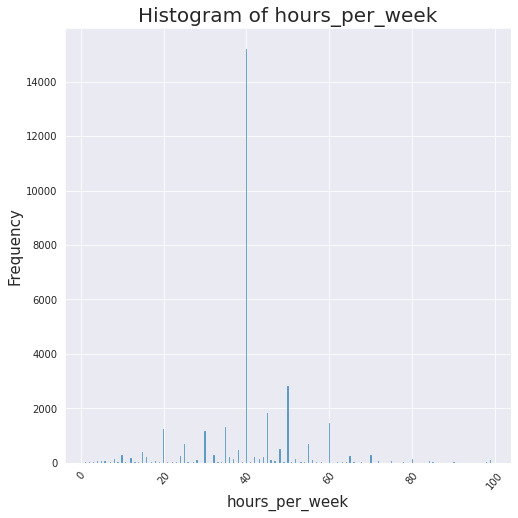

In [109]:
sns.set_style('darkgrid')
for col in num_cols:
#     print(col)
    plt.figure(figsize=(8,8))
    sns.histplot(df[col])
    plt.title(f"Histogram of {col}", fontsize=20)
    plt.xlabel(f"{col}", fontsize=15)
    plt.ylabel("Frequency", fontsize=15)
    plt.xticks(rotation=50)
    plt.show()

Plot `boxplot` for all the Numerical Columns

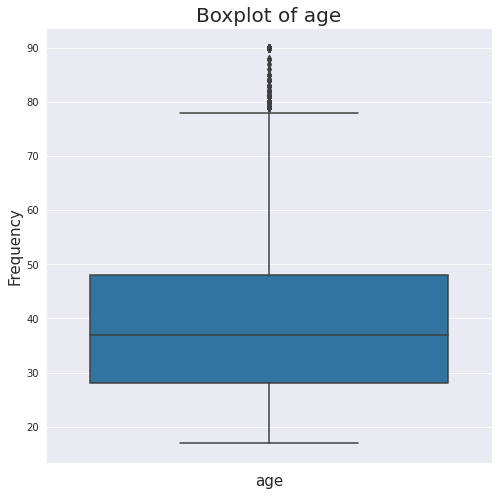

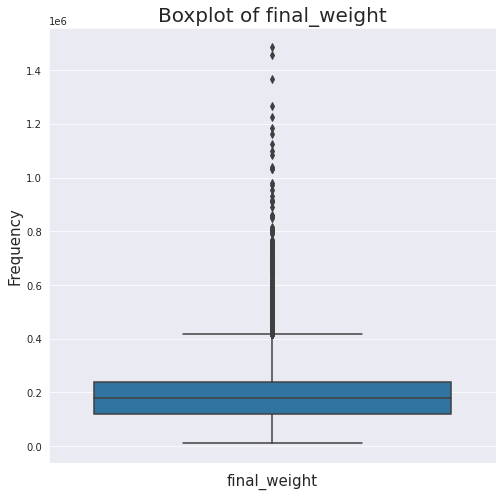

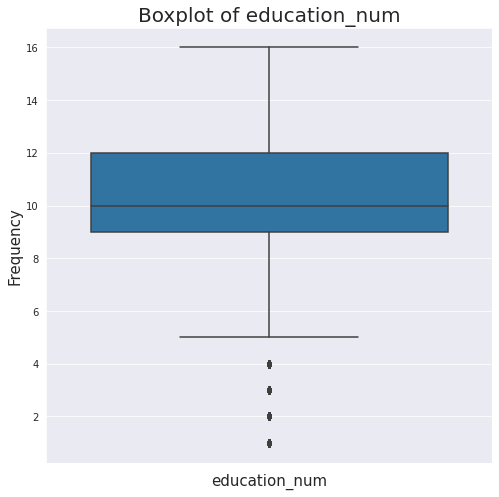

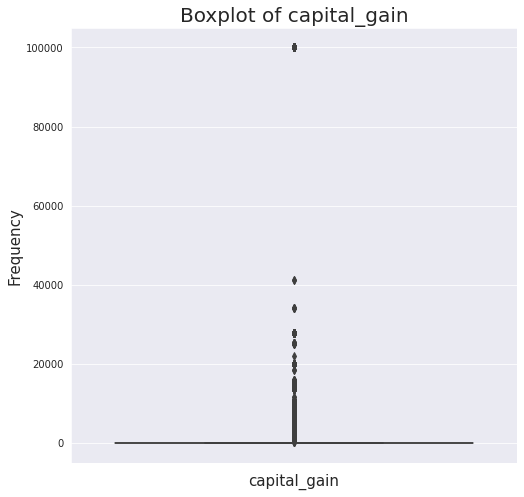

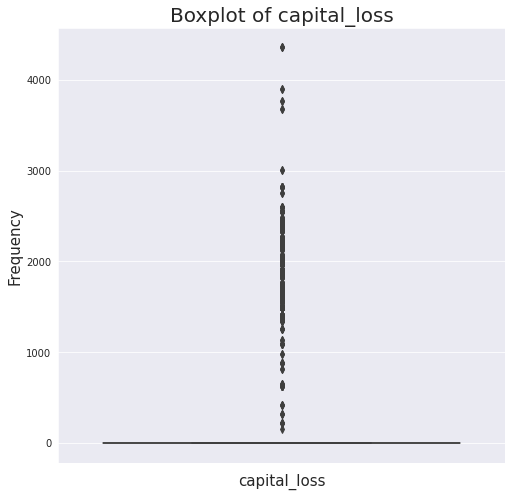

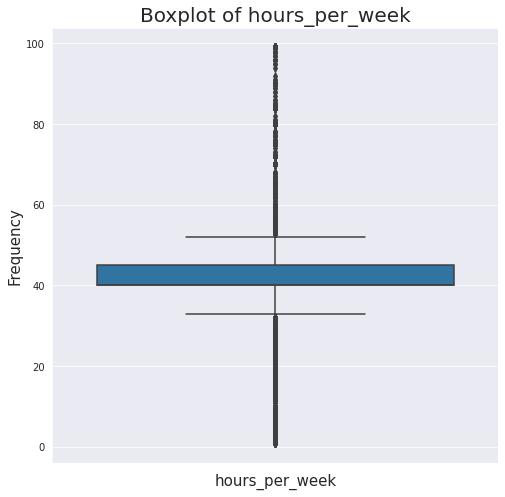

In [111]:
sns.set_style('darkgrid')
for col in num_cols:
#     print(col)
    plt.figure(figsize=(8,8))
    sns.boxplot(y = df[col])
    plt.title(f"Boxplot of {col}", fontsize=20)
    plt.xlabel(f"{col}", fontsize=15)
    plt.ylabel("Frequency", fontsize=15)
    plt.xticks(rotation=50)
    plt.show()


Plot a `heatmap` for numerical-categorical colummns

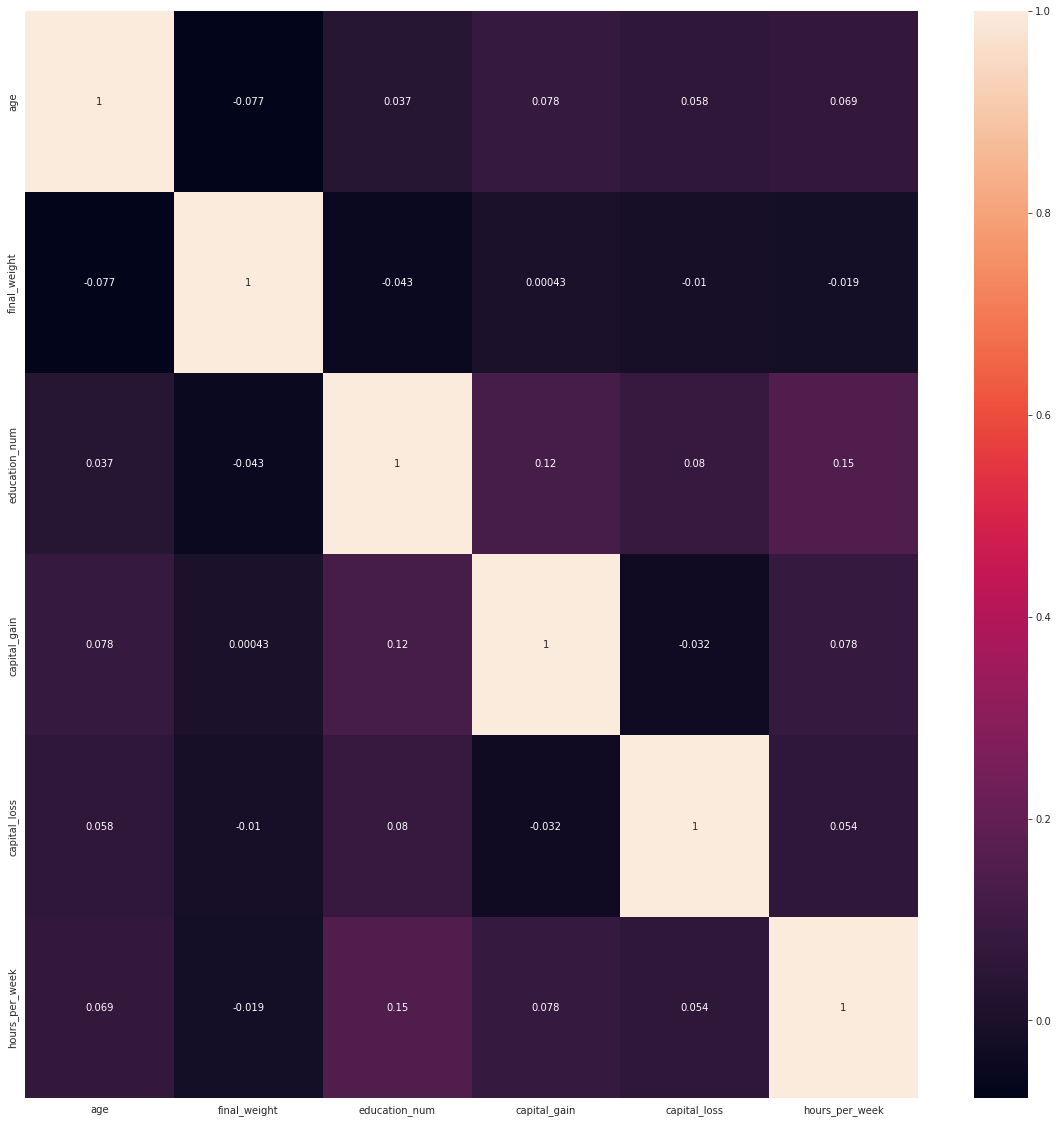

In [112]:
plt.figure(figsize=(20,20))
sns.heatmap(df.corr(), annot=True);

Plot a `pairplot` for numerical-categorical colummns

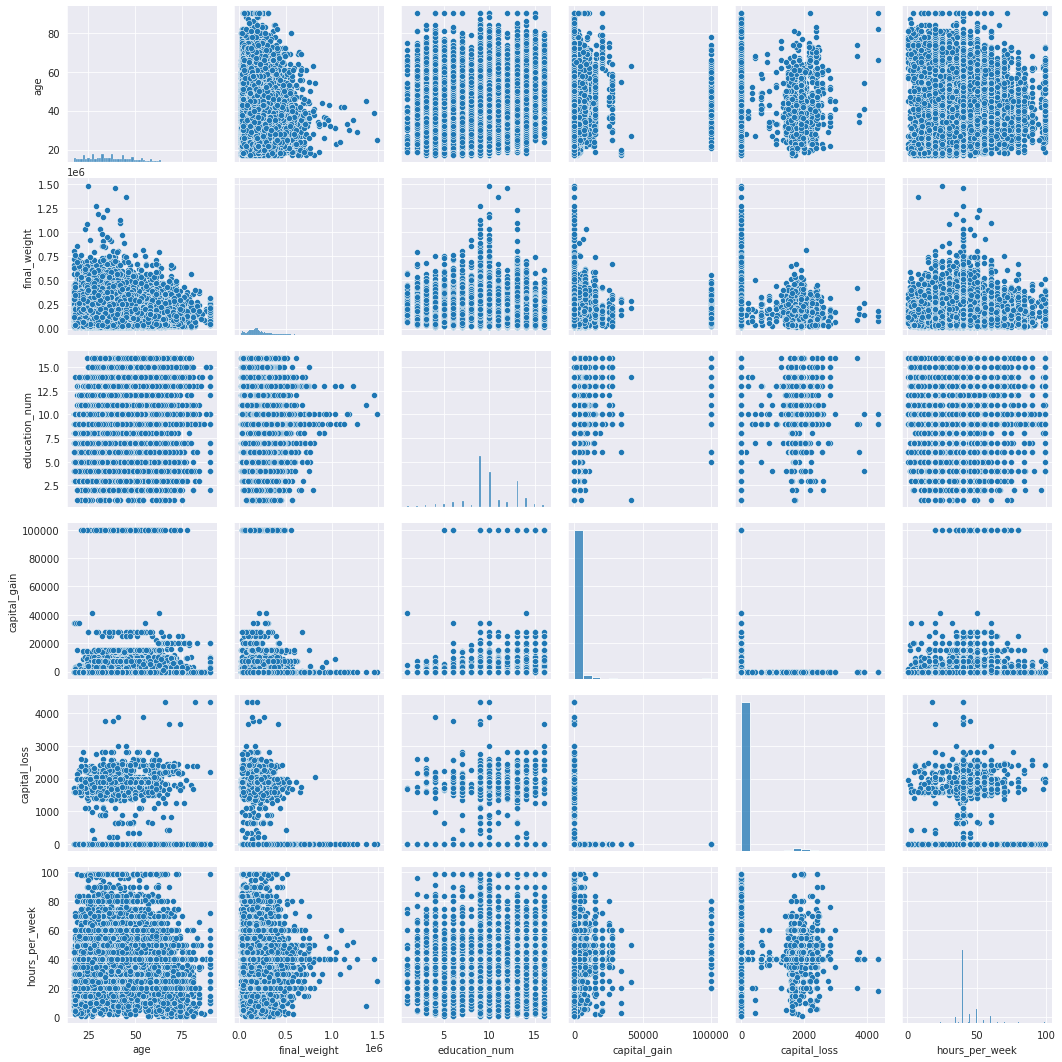

In [114]:
sns.pairplot(df);

In [115]:
df.columns

Index(['age', 'workclass', 'final_weight', 'education', 'education_num',
       'marital_status', 'occupation', 'relationship', 'race', 'sex',
       'capital_gain', 'capital_loss', 'hours_per_week', 'native_country',
       'target'],
      dtype='object')

### Pipeline for Feature Engineering

In [201]:
cat_columns = df.select_dtypes(exclude=np.number).columns.to_list()
num_columns = df.select_dtypes(include=np.number).columns.to_list()
features = df.drop(['target'], axis=1).columns.to_list()
label = 'target'
cat_columns.remove('target')



**Handling missing values in Numerical Columns**

In [213]:
# instance to handle missing values in numerical columns
n_imputer = SimpleImputer(strategy='median')
df[num_columns] = n_imputer.fit_transform(df[num_columns])

**Handling Outliers in Numerical Columns**

In [216]:
from sklearn.preprocessing import QuantileTransformer

 # instance to handle outliers for numerical columns
outliers = QuantileTransformer(output_distribution='normal',
                               n_quantiles=1000,
                               subsample=50000,
                               random_state=0,
                               copy=True)
df[num_columns] = outliers.fit_transform(df[num_columns])

**Handling missing values in categorical columns**

In [218]:
#  instance to handle missing values in categorical columns
c_imputer =  SimpleImputer(strategy='most_frequent')
df[cat_columns] = c_imputer.fit_transform(df[cat_columns])

### Column Transformer


In [244]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder

# Define the numerical feature column transformer
numerical_transformer = StandardScaler()

# Define the categorical feature column transformer
categorical_transformer = OneHotEncoder(handle_unknown='ignore')

# Define the column transformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, num_columns),
        ('cat', categorical_transformer, cat_columns)
    ])



### Train Test Validate Split

In [245]:
from sklearn.model_selection import train_test_split

#Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df[features], df[label], test_size=0.2, random_state=42)

# Split the training set into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)



In [246]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)
print(y_val.shape)
print(X_val.shape)

(20838, 14)
(6513, 14)
(20838,)
(6513,)
(5210,)
(5210, 14)


### Model Building


<img src="images/p2.png" align="center" height=500px width=500px>

In [222]:
from sklearn.pipeline import Pipeline
model =  Pipeline([('preprocessor',preprocessor),
                   ('KNN', KNeighborsClassifier())])
model


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['age', 'final_weight',
                                                   'education_num',
                                                   'capital_gain',
                                                   'capital_loss',
                                                   'hours_per_week']),
                                                 ('cat', OneHotEncoder(),
                                                  ['workclass', 'education',
                                                   'marital_status',
                                                   'occupation', 'relationship',
                                                   'race', 'sex',
                                                   'native_country'])])),
                ('KNN', KNeighborsClassifier())])

In [223]:
# fit the model on training dataset using fit method
model.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['age', 'final_weight',
                                                   'education_num',
                                                   'capital_gain',
                                                   'capital_loss',
                                                   'hours_per_week']),
                                                 ('cat', OneHotEncoder(),
                                                  ['workclass', 'education',
                                                   'marital_status',
                                                   'occupation', 'relationship',
                                                   'race', 'sex',
                                                   'native_country'])])),
                ('KNN', KNeighborsClassifier())])

In [231]:
y_pred = model.predict(X_test)

#### Model Evaluation using Train/Test Split

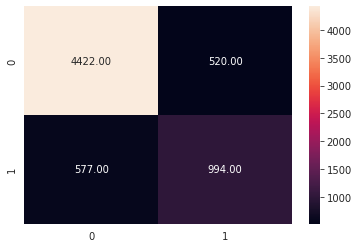

In [240]:
sns.heatmap(confusion_matrix(y_test,y_pred), annot=True, fmt='.2f',);

In [237]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

       <=50K       0.88      0.89      0.89      4942
        >50K       0.66      0.63      0.64      1571

    accuracy                           0.83      6513
   macro avg       0.77      0.76      0.77      6513
weighted avg       0.83      0.83      0.83      6513



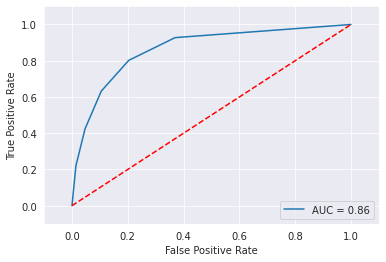

In [264]:
from sklearn.metrics import roc_auc_score
y_pred_proba = model.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba, pos_label=' >50K')
roc_auc = roc_auc_score(y_test, y_pred_proba,)
plt.plot(fpr, tpr, label='AUC = %0.2f'% roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.1,1.1])
plt.ylim([-0.1,1.1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()


### Model evaluation based on K-fold cross-validation using `cross_val_score()` function with `validation data`

In [247]:
model1 =  Pipeline([('preprocessor',preprocessor),
                   ('KNN', KNeighborsClassifier())])


result_accuracy = cross_val_score(model1, X_val, y_val, cv=10, scoring="accuracy")

result_log_loss = cross_val_score(model1, X_val, y_val, cv=10, scoring="neg_log_loss")

result_auc = cross_val_score(model1, X_val, y_val, cv=10, scoring="roc_auc")

In [248]:
# Results of the model using cross-validation 
print('K-fold cross-validation results:')
print(f"Average Accuracy : {result_accuracy.mean():.3f}")
print(f"Average Log Loss : {-result_log_loss.mean():.3f}")
print(f"Average AUC : {result_auc.mean():.3f}")

K-fold cross-validation results:
Average Accuracy : 0.825
Average Log Loss : 1.298
Average AUC : 0.845


In [272]:
from sklearn.neighbors import KNeighborsClassifier
Knn = KNeighborsClassifier()
knn.get_params()

{'algorithm': 'auto',
 'leaf_size': 30,
 'metric': 'minkowski',
 'metric_params': None,
 'n_jobs': None,
 'n_neighbors': 5,
 'p': 2,
 'weights': 'uniform'}

In [271]:
# from sklearn.pipeline import Pipeline
# from sklearn.feature_selection import SelectKBest
# from sklearn.ensemble import RandomForestClassifier
# from sklearn.model_selection import GridSearchCV

# # Create the pipeline
# pipe = Pipeline([("preprocessor", preprocessor),
#                 ('selector', SelectKBest()), 
#                  ('classifier', KNeighborsClassifier())])

# # Define the parameter grid
# param_grid = {
#     'selector__k': [10, 20, 30],
# #     'classifier__n_estimators': [10, 50, 100],
#     'n_neighbors': [3,5,7,9,11,15],
#     'metric': ['euclidean', 'manhattan'],
#     'weights': ['uniform', 'distance'],
#     'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
# #     'leaf_size': [10,30,50],
# #     'p': [1,2],
# }

# # Create the GridSearchCV object
# grid_search = GridSearchCV(pipe, param_grid, cv=5)

# # Fit the GridSearchCV object to the data
# grid_search.fit(X_val, y_val)

# # Print the best parameters and the best score
# print("Best parameters: ", grid_search.best_params_)
# print("Best score: ", grid_search.best_score_)


In this example, the parameter grid has 5 keys:
- `n_neighbors:` The number of nearest neighbors to use.
- `weights:` The weight function used in prediction. It can be either `uniform` for uniform weights or `distance` for weight points by the inverse of their distance.
- `algorithm:` The algorithm to be used for nearest neighbors calculation. `auto` will choose the best algorithm based on the data provided, `ball_tree` and `kd_tree` will create a tree-based nearest neighbor search structure, and `brute` will perform a brute-force search.
- `leaf_size:` The number of points at which to switch to brute-force.
- p: Power parameter for the Minkowski metric. When p = 1, this is equivalent to using Manhattan Distance (l1), and euclidean distance (l2) for p = 2.

It's important to note that the parameter grid can be adjusted as needed, depending on the size of the dataset and the desired level of granularity in the search.